In [15]:
import time
import os
import math
import numpy as np
import cv2
import pandas as pd
import pyautogui as pa
from scipy.stats import binom_test
from matplotlib.markers import TICKDOWN
from matplotlib import rcParams
import datetime
from scipy.stats import norm, kstest, sem
from numpy.polynomial import polynomial

from lib.auto_GUI.auto_GUI_base import AutoGUIBase
from lib.auto_GUI.auto_PhotoZ import AutoPhotoZ
from lib.analysis.laminar_dist import *
from lib.file.ROI_reader import ROIFileReader
from lib.analysis.cell_roi import OverlapCounterROI

In [16]:
data_dir = "C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/"

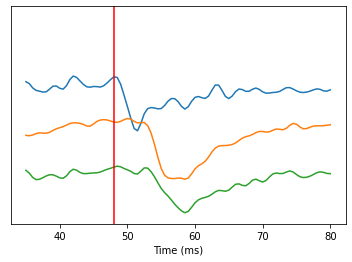

In [17]:
rcParams.update({'font.size': 10})

trace_sample = 'scnn1a-init/select/06-26-23/ROIs-barrels-traces.dat'
trace_sample = pd.read_csv(data_dir + trace_sample,
                         sep='\t',
                         header=0,
                         names=['Index',  'L2/3 Barrel A',  'L4 Barrel A',  'L4 Barrel B'])
plt.clf()
start_cut = 70
end_cut = 160
baseline = 10
v1 = trace_sample.loc[start_cut:end_cut, ["L2/3 Barrel A"]] + baseline
v2 = trace_sample.loc[start_cut:end_cut, ["L4 Barrel A"]] + baseline * 2
v3 = trace_sample.loc[start_cut:end_cut, ["L4 Barrel B"]] + baseline * 3
t = [(i+start_cut) * 0.5 for i in range(len(v1))]
plt.plot(t, v1, label='L2/3 Barrel A')
plt.plot(t, v2, label='L4 Barrel A')
plt.plot(t, v3, label='L4 Barrel B')
plt.axvline(x=48, label="Stimulation Time", color='red')
# plt.legend(bbox_to_anchor=(0.79, .97), loc='upper center')
plt.yticks([])
plt.ylim(40, -10)
plt.xlabel("Time (ms)")
plt.savefig(data_dir + "scnn1a-init/select/06-26-23/ROIs-barrels-traces.png")
plt.show() 

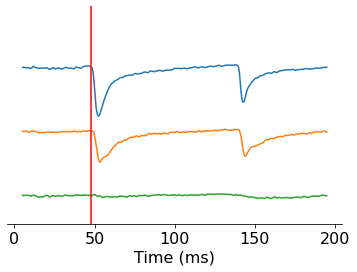

In [26]:
rcParams.update({'font.size': 16})

trace_sample = '03-05-24/barrels-traces-2.dat'
trace_sample = pd.read_csv(data_dir + trace_sample,
                         sep='\t',
                         header=0,
                         names=['Index',  'Barrel A',  'Barrel B',  'Barrel C'])
plt.clf()
start_cut = 10
end_cut = 390
baseline = 25
v1 = trace_sample.loc[start_cut:end_cut, ["Barrel A"]] + baseline
v2 = trace_sample.loc[start_cut:end_cut, ["Barrel B"]] + baseline * 2
v3 = trace_sample.loc[start_cut:end_cut, ["Barrel C"]] + baseline * 3
t = [(i+start_cut) * 0.5 for i in range(len(v1))]
plt.plot(t, 1-v1, label='Barrel A')
plt.plot(t, 1-v2, label='Barrel B')
plt.plot(t, 1-v3, label='Barrel C')
plt.axvline(x=48, label="Stimulation Time", color='red')
#plt.legend(bbox_to_anchor=(0.79, .97), loc='upper center')
plt.yticks([])
plt.ylim(-85,0 )
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig(data_dir + "03-05-24/barrels-traces.png")
plt.show() 

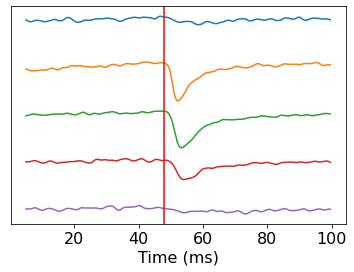

In [19]:
rcParams.update({'font.size': 16})

trace_sample = '02-07-24/barrels-traces.dat'
trace_sample = pd.read_csv(data_dir + trace_sample,
                         sep='\t',
                         header=0,
                         names=['Index',  'Barrel A',  'Barrel B',  'Barrel C', 'Barrel D',  'Barrel E'])
plt.clf()
start_cut = 10
end_cut = 390
baseline = 10
v1 = trace_sample.loc[start_cut:end_cut, ["Barrel A"]] + baseline
v2 = trace_sample.loc[start_cut:end_cut, ["Barrel B"]] + baseline * 2
v3 = trace_sample.loc[start_cut:end_cut, ["Barrel C"]] + baseline * 3
v4 = trace_sample.loc[start_cut:end_cut, ["Barrel D"]] + baseline * 4
v5 = trace_sample.loc[start_cut:end_cut, ["Barrel E"]] + baseline * 5
t = [(i+start_cut) * 0.5 for i in range(len(v1))]
plt.plot(t, 1-v1, label='Barrel A')
plt.plot(t, 1-v2, label='Barrel B')
plt.plot(t, 1-v3, label='Barrel C')
plt.plot(t, 1-v4, label='Barrel D')
plt.plot(t, 1-v5, label='Barrel E')
plt.axvline(x=48, label="Stimulation Time", color='red')
#plt.legend(bbox_to_anchor=(0.79, .97), loc='upper center')
plt.yticks([])
# plt.ylim(0, 70)
plt.xlabel("Time (ms)")
plt.savefig(data_dir + "02-07-24/barrels-traces.png")
plt.show() 

In [20]:
rcParams.update({'font.size': 22})
for fn in ['Traces_single_stim_1',  'Traces_single_stim_2']:
    trace_sample = '11-27-23/selected_zda/' + fn +'.dat'
    trace_sample = pd.read_csv(data_dir + trace_sample,
                             sep='\t',
                             header=0,
                             names=['Index',  'Barrel C',  'Barrel B',  'Barrel A'])
    plt.clf()
    start_cut = 40
    end_cut = 180
    baseline = 3
    v1 = trace_sample.loc[start_cut:end_cut, ["Barrel A"]] + baseline * 3
    v2 = trace_sample.loc[start_cut:end_cut, ["Barrel B"]] + baseline * 2
    v3 = trace_sample.loc[start_cut:end_cut, ["Barrel C"]] + baseline
    t = [(i+start_cut) * 0.5 for i in range(len(v1))]
    plt.plot(t, v1, label='Barrel A', linewidth=3.5)
    plt.plot(t, v2, label='Barrel B', linewidth=3.5)
    plt.plot(t, v3, label='Barrel C', linewidth=3.5)
    plt.axvline(x=48, label="Stimulation Time", color='red')
    plt.legend(bbox_to_anchor=(1.59, .97), loc='upper center')
    plt.yticks([])
    plt.xlabel("Time (ms)")
    plt.savefig(data_dir + "11-27-23/selected_zda/" + fn +".png")
    plt.show() 

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/11-27-23/selected_zda/Traces_single_stim_1.dat'

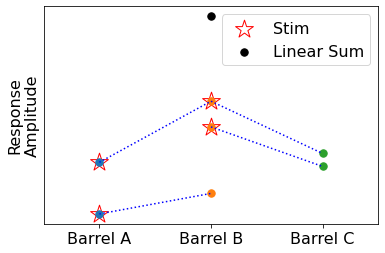

In [ ]:
rcParams.update({'font.size': 16})

def draw_arrow(p1, p2):
    x, y = p1
    x2, y2 = p2
    plt.plot([x, x2], [y, y2], 'b-', linestyle='dotted')

single_stim_upper = [3.02149, 3.70894, None]
single_stim_lower = [None, 5.9379, 4.61269]
double_stim = [4.75271, 6.79893, 5.04772]
recs = [single_stim_upper, single_stim_lower, double_stim]
barrel_a = [x[0] for x in recs]
barrel_b = [x[1] for x in recs]
barrel_c = [x[2] for x in recs]

linear_sum = 3.70894 + 5.9379

draw_arrow([0, 3.02149], [1, 3.70894])
draw_arrow([1, 5.9379], [2, 4.61269])
draw_arrow([0, 4.75271], [1, 6.79893])
draw_arrow([1, 6.79893], [2, 5.04772])

# plot stims
plt.scatter([0], [3.02149], color='white', marker='*', s=350, edgecolors='red', label='Stim')
plt.scatter([1], [5.9379], color='white', marker='*', s=350, edgecolors='red')
plt.scatter([0], [4.75271], color='white', marker='*', s=350, edgecolors='red')
plt.scatter([1], [6.79893], color='white', marker='*', s=350, edgecolors='red')

plt.scatter([0]*3, barrel_a, color='tab:blue', s=55)
plt.scatter([1]*3, barrel_b, color='tab:orange', s=55)
plt.scatter([2]*3, barrel_c, color='tab:green', s=55)
plt.scatter([1]*3, [None, linear_sum, None], color='black', s=55, label="Linear Sum")

xtick_labels = ['Barrel A', 'Barrel B', 'Barrel C']
plt.xticks(range(0, len(xtick_labels)), xtick_labels)
plt.xlim([-0.5, 2.5])
plt.ylabel("Response\nAmplitude")
plt.yticks([])
plt.legend()
plt.savefig(data_dir + "11-27-23/selected_zda/amplitudes.png")
plt.show()

In [ ]:

def baseline_correct(trace, skip_window, fit_type="Polynomial-8th"):
    t = np.linspace(0, len(trace) * 0.5, len(trace))
    full_t = np.linspace(0, len(trace) * 0.5, len(trace))
    skip_start, skip_end = skip_window
    trace = np.array(trace)

    skip_int = [i for i in range(skip_start, skip_end) if i < trace.shape[0]]
    trace_skipped = trace
    t_skipped = t
    if len(skip_int) > 0:
        trace_skipped = np.delete(trace, skip_int)
        t_skipped = np.delete(t, skip_int)
    if t_skipped.size < 1:
        return trace

    poly_powers = {
        'Quadratic': 2,
        'Cubic': 3,
        "Polynomial-8th": 8
    }

    power = poly_powers[fit_type]
    coeffs, stats = polynomial.polyfit(t_skipped, trace_skipped, power, full=True)
    reg = np.array(polynomial.polyval(full_t, coeffs))

    full_trace = (trace.reshape(-1, 1) - reg.reshape(-1, 1)).reshape(-1)
    return full_trace
    ################################################################################
    

10ms


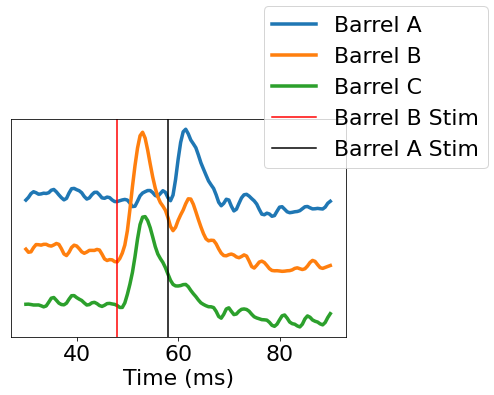

20ms


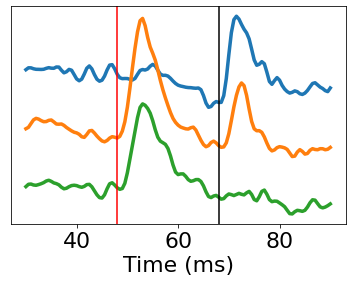

30ms


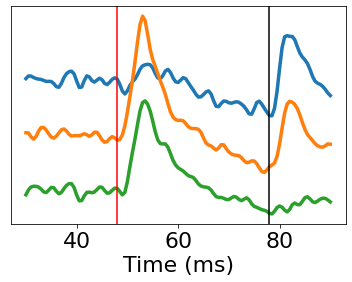

40ms
50ms
60ms
70ms
80ms


In [ ]:
rcParams.update({'font.size': 22})
for tt in range(1, 9):
    time = str(tt * 10) + 'ms'
    print(time)
    trace_sample = '11-27-23/selected_zda/Traces_' + time + '.dat'
    try:
        trace_sample = pd.read_csv(data_dir + trace_sample,
                                 sep='\t',
                                 header=0,
                                 names=['Index',  'Barrel C',  'Barrel B',  'Barrel A'])
    except Exception as e:
        continue
    plt.clf()
    start_cut = 60
    end_cut = 180
    baseline = 3
    v1 = trace_sample.loc[start_cut:end_cut, ["Barrel A"]] 
    v2 = trace_sample.loc[start_cut:end_cut, ["Barrel B"]] 
    v3 = trace_sample.loc[start_cut:end_cut, ["Barrel C"]]
    t = [(i+start_cut) * 0.5 for i in range(len(v1))]
    
    # skip_window = [96, 126]
    # v1 = baseline_correct(v1, skip_window)
    # v2 = baseline_correct(v2, skip_window)
    # v3 = baseline_correct(v3, skip_window)
    
    v1 += baseline * 3
    v2 += baseline * 2
    v3 += baseline 
    
    plt.plot(t, v1, linewidth=3.5, label="Barrel A")
    plt.plot(t, v2, linewidth=3.5, label="Barrel B")
    plt.plot(t, v3, linewidth=3.5, label="Barrel C")
    plt.axvline(x=48, label="Barrel B Stim", color='red')
    plt.axvline(x=(48 + tt * 10), label="Barrel A Stim", color='black')
    if tt == 1:
        plt.legend(bbox_to_anchor=(1.09, 1.57), loc='upper center')
    plt.yticks([])
    plt.xlabel("Time (ms)")
    plt.savefig(data_dir + "11-27-23/selected_zda/Traces_" + time + ".png")
    plt.show()

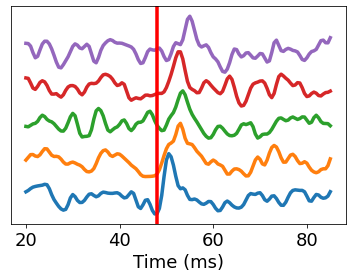

In [ ]:
rcParams.update({'font.size': 18})

trace_sample = '11-30-23/selected_zda/Traces_03_03_03_red.dat'
trace_sample = '11-30-23/selected_zda/Traces_high_amp.dat'
n_traces = 5
trace_sample = pd.read_csv(data_dir + trace_sample,
                         sep='\t',
                         header=0,
                         names=['Index'] + ['ROI' + str(i) for i in range(1,n_traces+1)])
plt.clf()
start_cut = 40
end_cut = 170
baseline = 8.5
t = None
j = 0
for i in [2,4,5,3,1]:
    v1 = trace_sample.loc[start_cut:end_cut, ['ROI' + str(i)]] + baseline * j
    j += 1
    if t is None:
        t = [(i+start_cut) * 0.5 for i in range(len(v1))]
    plt.plot(t, v1, linewidth=3.5)
plt.axvline(x=48, label="Stimulation Time", color='red', linewidth=3.5)
#plt.legend(bbox_to_anchor=(0.79, .97), loc='upper center')
plt.yticks([])
plt.xlabel("Time (ms)")
plt.savefig(data_dir + "11-27-23/selected_zda/Traces_0ms.png")
plt.show() 

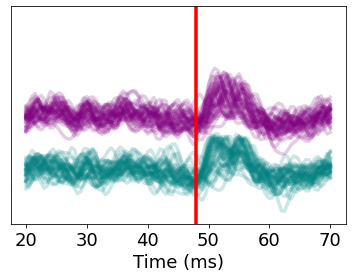

In [ ]:
rcParams.update({'font.size': 18})


trace_sample = '11-30-23/selected_zda/Traces_GMM95.dat'
n_traces = 40
trace_sample = pd.read_csv(data_dir + trace_sample,
                         sep='\t',
                         header=0,
                         names=['Index'] + ['ROI' + str(i) for i in range(1,n_traces+1)])
plt.clf()
start_cut = 40
end_cut = 140
baseline = 0
t = None
j = 0
for i in range(1, n_traces+1):
    v1 = trace_sample.loc[start_cut:end_cut, ['ROI' + str(i)]] + baseline * j
    j += 1
    if t is None:
        t = [(i+start_cut) * 0.5 for i in range(len(v1))]
    plt.plot(t, v1, linewidth=3.5, alpha=.2, color='teal')
#plt.plot(t, v1, label="hVOS GMM", color='teal')
plt.yticks([])
plt.xlabel("Time (ms)")

trace_sample = '11-30-23/selected_zda/Traces_manual.dat'
trace_sample = pd.read_csv(data_dir + trace_sample,
                         sep='\t',
                         header=0,
                         names=['Index'] + ['ROI' + str(i) for i in range(1,n_traces+1)])

baseline = 10
t = None
j = 0
for i in range(1, n_traces+1):
    v1 = trace_sample.loc[start_cut:end_cut, ['ROI' + str(i)]] + baseline
    j += 1
    if t is None:
        t = [(i+start_cut) * 0.5 for i in range(len(v1))]
    plt.plot(t, v1, linewidth=3.5, alpha=.2, color='purple')
#plt.plot(t, v1, label="hVOS manual", color='purple')
plt.axvline(x=48, label="Stimulation Time", color='red', linewidth=3.5)
rcParams.update({'font.size': 14})
#plt.legend(bbox_to_anchor=(0.26, .97), loc='upper center')
plt.ylim([-10,30])
plt.savefig(data_dir + "11-27-23/selected_zda/Traces_manualGMM.png")
plt.show() 

In [ ]:
# overlap
gmm_roi = '11-30-23/converted_zda/ROIs_GMM95.dat'
man_roi = '11-30-23/converted_zda/ROIs_manual.dat'
red_roi = '11-30-23/converted_zda/ROIs_03_03_03_red.dat'

gmm = ROIFileReader(data_dir + gmm_roi).get_roi_list()
man = ROIFileReader(data_dir + man_roi).get_roi_list()
red = ROIFileReader(data_dir + red_roi).get_roi_list()
ocr1 = OverlapCounterROI(gmm, man)
print(ocr1.get_num_rois_overlap())

num_gmm, num_man = ocr1.get_num_occupied()

ocr1 = OverlapCounterROI(red, man)
red_man_overlap = ocr1.get_num_rois_overlap()
print(red_man_overlap)

ocr1 = OverlapCounterROI(red, gmm)
red_gmm_overlap = ocr1.get_num_rois_overlap()
print(red_gmm_overlap)
num_red, _ = ocr1.get_num_occupied()

print(num_gmm, num_man, num_red)

percent_gmm_red_overlap_expected = num_gmm * num_red / (6400 ** 2)
percent_man_red_overlap_expected = num_man * num_red / (6400 ** 2)

print(percent_gmm_red_overlap_expected, percent_gmm_red_overlap_expected)

print("\n\n\n\t\t\t", "Manual","\t",  "GMM")
print("Num overlap expected:", 
      "\t", percent_man_red_overlap_expected * 6400, 
      "\t", percent_gmm_red_overlap_expected * 6400)
print("Num overlap actual:", 
      "\t", red_man_overlap, 
      "\t\t", red_gmm_overlap)

percent_man_red_overlap_expected = num_man * num_gmm / (6400 ** 2)
print(percent_man_red_overlap_expected * 6400)

21
0
2
256 119 47
0.00029375 0.00029375



			 Manual 	 GMM
Num overlap expected: 	 0.87390625 	 1.8800000000000001
Num overlap actual: 	 0 		 2
4.760000000000001


In [ ]:
# figure out if each barrel crossing is in the medial direction
data = {}
for stim_loc in ['L2/3', 'L4', 'L5']:
    df2 = df[df['Stim Location'].str.contains(stim_loc)]
    print("\nBarrel pairs in", stim_loc)
    
    df_medial3 = df2[df2["Most Medial Barrel"] == 3]
    df_medial1 = df2[df2["Most Medial Barrel"] == 1]
    # if most medial barrel is 3, then:
    #    - if stim barrel is 3, crossing 2/3 is lateral.
    #    - if stim barrel is 2, crossing 2/3 is medial, crossing 1/2 is lateral
    #    - if stim barrel is 1, crossing 1/2 is medial
    # if most medial barrel is 1, then:
    #    - if stim barrel is 1, crossing 1/2 is lateral.
    #    - if stim barrel is 2, crossing 1/2 is medial, crossing 2/3 is lateral
    #    - if stim barrel is 3, crossing 2/3 is medial
    
    k_medial_cross = len(df_medial1[(df_medial1['# crossings 2/3'] > 0) 
                                   & (df_medial1['Stim Barrel'] == 3)])
    k_lateral_cross = len(df_medial3[(df_medial3['# crossings 2/3'] > 0)
                                   & (df_medial3['Stim Barrel'] == 3)])
    k_medial_cross += len(df_medial3[(df_medial3['# crossings 2/3'] > 0)
                                   & (df_medial3['Stim Barrel'] == 2)])
    k_lateral_cross += len(df_medial3[(df_medial3['# crossings 1/2'] > 0)
                                   & (df_medial3['Stim Barrel'] == 2)])
    k_medial_cross += len(df_medial3[(df_medial3['# crossings 1/2'] > 0)
                                   & (df_medial3['Stim Barrel'] == 1)])
    k_lateral_cross += len(df_medial1[(df_medial1['# crossings 1/2'] > 0)
                                   & (df_medial1['Stim Barrel'] == 1)])
    k_medial_cross += len(df_medial1[(df_medial1['# crossings 1/2'] > 0) 
                                   & (df_medial1['Stim Barrel'] == 2)])
    k_lateral_cross += len(df_medial1[(df_medial1['# crossings 2/3'] > 0) 
                                   & (df_medial1['Stim Barrel'] == 2)])
    
    n_medial = k_medial_cross
    n_lateral = k_lateral_cross
    n_medial += len(df_medial1[(df_medial1['# no crossings 2/3'] > 0) 
                                   & (df_medial1['Stim Barrel'] == 3)])
    n_lateral += len(df_medial3[(df_medial3['# no crossings 2/3'] > 0)
                                   & (df_medial3['Stim Barrel'] == 3)])
    n_medial += len(df_medial3[(df_medial3['# no crossings 2/3'] > 0)
                                   & (df_medial3['Stim Barrel'] == 2)])
    n_lateral += len(df_medial3[(df_medial3['# no crossings 1/2'] > 0)
                                   & (df_medial3['Stim Barrel'] == 2)])
    n_medial += len(df_medial3[(df_medial3['# no crossings 1/2'] > 0)
                                   & (df_medial3['Stim Barrel'] == 1)])
    n_lateral += len(df_medial1[(df_medial1['# no crossings 1/2'] > 0) 
                                   & (df_medial1['Stim Barrel'] == 1)])
    n_medial += len(df_medial1[(df_medial1['# no crossings 1/2'] > 0) 
                                   & (df_medial1['Stim Barrel'] == 2)])
    n_lateral += len(df_medial1[(df_medial1['# no crossings 2/3'] > 0) 
                                   & (df_medial1['Stim Barrel'] == 2)])
    
    print("Medial")
    print("\t", k_medial_cross, "crossing out of", n_medial, "in layer", stim_loc)

    print("Lateral")
    print("\t", k_lateral_cross, "crossing out of", n_lateral, "in layer", stim_loc)
    
    data[stim_loc] = {"Medial": {}, "Lateral":{} }
    data[stim_loc]["Medial"]['n_barrel_cross'] = k_medial_cross
    data[stim_loc]["Medial"]['total'] = n_medial
    data[stim_loc]["Lateral"]['n_barrel_cross'] = k_lateral_cross
    data[stim_loc]["Lateral"]['total'] = n_lateral

In [ ]:
def significance_bar(start,end,height,displaystring,linewidth = 1.2,markersize = 8,boxpad  =0.3,fontsize = 15,color = 'k'):
    # draw a line with downticks at the ends
    plt.plot([start,end],[height]*2,'-',color = color,lw=linewidth,marker = TICKDOWN,markeredgewidth=linewidth,markersize = markersize)
    # draw the text with a bounding box covering up the line
    plt.text(0.5*(start+end),height,displaystring,ha = 'center',va='center',bbox=dict(facecolor='1.', edgecolor='none',boxstyle='Square,pad='+str(boxpad)),size = fontsize)

n_L23 = {'medial' : data['L2/3']["Medial"]['total'],
         'lateral' : data['L2/3']["Lateral"]['total']}
n_L4 = {'medial' : data['L4']["Medial"]['total'],
         'lateral' : data['L4']["Lateral"]['total']}
n_L5 = {'medial' : data['L5']["Medial"]['total'],
        'lateral' : data['L5']["Lateral"]['total']}

plt.clf()
i = 0
tick_labels = []
colors = {"# crossing medial": 'tab:blue', 
          "# crossing lateral": 'tab:red'}
# in format # no crossing, # crossing, # no signal; l2/3, L4, L5

length_of_previous_sl = i

all_layers = ['L2/3', 'L4']
totals = {'medial' : [], 'lateral': [] }
for med in ['medial', 'lateral']:
    if n_L23[med] > 0:
        totals[med].append(n_L23[med])
    if n_L4[med] > 0:
        totals[med].append(n_L4[med])
    if n_L5[med] > 0:
        totals[med].append(n_L5[med])


# in columns L23, L4, L5
crossing_data = {
    '# crossing medial': [data[x]['Medial']['n_barrel_cross'] for x in all_layers],
    '# crossing lateral': [data[x]['Lateral']['n_barrel_cross'] for x in all_layers]
}
errbars = {}
for k in crossing_data:
    errbars[k] = [np.sqrt(x) for x in crossing_data[k]]
    med = 'lateral'
    if 'medial' in k:
        med = 'medial'
    for j in range(len(errbars[k])):
        print(errbars[k][j], totals[med][j])
        errbars[k][j] /= totals[med][j] / 100
        crossing_data[k][j] /= totals[med][j] / 100 

labels = [x for x in crossing_data.keys()]
#tick_labels += [all_layers['medial'][j] + "\n(n="+str(totals['medial'][j]) + ")"
#                            for j in range(len(all_layers))]
#tick_labels += [all_layers['lateral'][j] + "\n(n="+str(totals['lateral'][j]) + ")"
#                            for j in range(len(all_layers))]

tick_labels = ['L2/3\nn=' + str(n_L23['medial'])
                   + "   n=" + str(n_L23['lateral']),
               'L4\nn=' + str(n_L4['medial'])
                   + "   n=" + str(n_L4['lateral'])]
#,
#              'L5\nn=' + str(n_L5['medial'])
#                   + "   n=" + str(n_L5['lateral'])]

print(errbars)
print(crossing_data)

# This is a binomial experiment of n independent trials.
# We use the Binomial case of goodness of fit test to a 
# chi-squared distribution
pvals = []
for med in ['medial', 'lateral']:
    for i in range(2):
        layer = ['L2/3', 'L4', 'L5'][i]
        n = [n_L23[med], n_L4[med], n_L5[med]][i]
        cr = crossing_data['# crossing ' + med][i]
        k = n * cr / 100 # number of crosses

        null_hyp_p = 0.5

        pval = binom_test(k, n, null_hyp_p, alternative='two-sided')
        print("Binomial test pval for dir " + med + ", layer", 
              layer, ":", pval)
        pvals.append(pval)
    
##########################
for nm in crossing_data:
    x = np.arange(len(all_layers))
    # else:
    plt.bar(x + (i-1) * 0.2, 
        crossing_data[nm],
        0.2,
        label=(nm if length_of_previous_sl == 0 else None),
        color=colors[nm])
    plt.errorbar(x + (i-1) * 0.2, 
                crossing_data[nm],
                yerr=errbars[nm],
                fmt='none',
                color='black')
    i += 1

#for i in range(3):
    #if pvals[i] < 0.001:
        #significance_bar(i-.5, i+0.25, 20, "P<0.001", fontsize=10)
    
plt.title("Frequency of Signal Pattern in Barrel Pairs by Layer")
plt.xlabel("Stimulation Layer")
plt.ylabel("% of Barrel Pair Crossings")
#plt.xticks(rotation='vertical')
plt.xticks(np.arange(0.12,len(tick_labels)+0.12), tick_labels)
plt.legend(bbox_to_anchor=(0.82, 1.0), loc='upper center')
plt.savefig(data_dir + "results_count-medial_oct2023.png")
plt.show()

In [ ]:
# latency plots
plt.clf()
i = 1
xtick_labels = []
df_datasets = []
for stim_loc in ['L2/3', 'L4']:
    df2 = df[df['Stim Location'].str.contains(stim_loc)]
    df_medial3 = df2[df2["Most Medial Barrel"] == 3]
    df_medial1 = df2[df2["Most Medial Barrel"] == 1]
    medial_lat = []
    lateral_lat = []
    medial_lat.append(df_medial1[(df_medial1['abs(delta 2)'] > 0) 
                                   & (df_medial1['Stim Barrel'] == 3)]['abs(delta 2)'])
    lateral_lat.append(df_medial3[(df_medial3['abs(delta 2)'] > 0)
                                   & (df_medial3['Stim Barrel'] == 3)]['abs(delta 2)'])
    medial_lat.append(df_medial3[(df_medial3['abs(delta 2)'] > 0)
                                   & (df_medial3['Stim Barrel'] == 2)]['abs(delta 2)'])
    lateral_lat.append(df_medial3[(df_medial3['abs(delta 1)'] > 0)
                                   & (df_medial3['Stim Barrel'] == 2)]['abs(delta 1)'])
    medial_lat.append(df_medial3[(df_medial3['abs(delta 1)'] > 0)
                                   & (df_medial3['Stim Barrel'] == 1)]['abs(delta 1)'])
    lateral_lat.append(df_medial1[(df_medial1['abs(delta 1)'] > 0)
                                   & (df_medial1['Stim Barrel'] == 1)]['abs(delta 1)'])
    medial_lat.append(df_medial1[(df_medial1['abs(delta 1)'] > 0) 
                                   & (df_medial1['Stim Barrel'] == 2)]['abs(delta 1)'])
    lateral_lat.append(df_medial1[(df_medial1['abs(delta 2)'] > 0) 
                                   & (df_medial1['Stim Barrel'] == 2)]['abs(delta 2)'])
    
    medial_lat = pd.concat(medial_lat)
    lateral_lat = pd.concat(lateral_lat)
    
    #dfd1_ant = df2_ant['abs(delta 1)'].dropna()
    #dfd2_ant = df2_ant['abs(delta 2)'].dropna()
    
    #df2_post = df2[df2['Slice Location'] == "Posterior"]
    #dfd1_post = df2_post['abs(delta 1)'].dropna()
    #dfd2_post = df2_post['abs(delta 2)'].dropna()
    
    #dfds_ant = np.concatenate([dfd1_ant, dfd2_ant])
    #dfds_post = np.concatenate([dfd1_post, dfd2_post])
    
    jittered_xs_1 = np.random.normal(i, 0.04, lateral_lat.shape[0])
    jittered_xs_2 = np.random.normal(i+1, 0.04, medial_lat.shape[0])
    plt.scatter(jittered_xs_1, lateral_lat, alpha=0.5, color='blue')
    plt.scatter(jittered_xs_2, medial_lat, alpha=0.5, color='green')

    xtick_labels.append(stim_loc + "\nLateral\n(n=" + str(len(lateral_lat)) +")")
    df_datasets.append(lateral_lat)
    xtick_labels.append(stim_loc + "\nMedial\n(n=" + str(len(medial_lat)) +")")
    df_datasets.append(medial_lat)
    i += 2

"""# calculate significance
for sl1 in ['ant', 'post']:
    for sl2 in ['ant', 'post']:
        for la1 in ['L2/3', 'L4', 'L5']:
            for la2 in ['L2/3', 'L4', 'L5']:
                if sl1 == sl2 and la1 == la2:
                    continue
                elif len(dists[sl1][la1]) < 3 or len(dists[sl2][la2]) < 3:
                    continue
                else:
                    p_val = kstest(dists[sl1][la1], dists[sl2][la2]).pvalue
                    if p_val < 0.05:
                        print('KS test for ' + sl1 + " layer " + la1 + " and", 
                              sl2 + " layer " + la2,
                             "is significant with p-value ", p_val)
"""
# significance: L2/3 Rostral and L4 Rostral, and 
#               L2/3 Rostral and L4 Caudal
#significance_bar(0.75, 2.25, 3.35, "P<0.05", fontsize=10)

plt.boxplot(df_datasets)
plt.xticks(range(1, len(xtick_labels)+1), xtick_labels)
plt.title("Latency of L4 Barrel Pair Crossings")
plt.xlabel("Stimulation Layer")
plt.ylabel("Latency (ms)")
plt.savefig(data_dir + cell_type_prefix + "_results_latency_medial-bias_" + str(datetime.date.today()) +".png", bbox_inches="tight")
plt.show()


In [ ]:
# Lump layers together
# latency plots
plt.clf()
i = 1
xtick_labels = []
df_datasets = []
df2 = df
df_medial3 = df2[df2["Most Medial Barrel"] == 3]
df_medial1 = df2[df2["Most Medial Barrel"] == 1]
    
medial_lat = []
lateral_lat = []
medial_lat.append(df_medial1[(df_medial1['abs(delta 2)'] > 0) 
                               & (df_medial1['Stim Barrel'] == 3)]['abs(delta 2)'])
lateral_lat.append(df_medial3[(df_medial3['abs(delta 2)'] > 0)
                               & (df_medial3['Stim Barrel'] == 3)]['abs(delta 2)'])
medial_lat.append(df_medial3[(df_medial3['abs(delta 2)'] > 0)
                               & (df_medial3['Stim Barrel'] == 2)]['abs(delta 2)'])
lateral_lat.append(df_medial3[(df_medial3['abs(delta 1)'] > 0)
                               & (df_medial3['Stim Barrel'] == 2)]['abs(delta 1)'])
medial_lat.append(df_medial3[(df_medial3['abs(delta 1)'] > 0)
                               & (df_medial3['Stim Barrel'] == 1)]['abs(delta 1)'])
lateral_lat.append(df_medial1[(df_medial1['abs(delta 1)'] > 0)
                               & (df_medial1['Stim Barrel'] == 1)]['abs(delta 1)'])
medial_lat.append(df_medial1[(df_medial1['abs(delta 1)'] > 0) 
                               & (df_medial1['Stim Barrel'] == 2)]['abs(delta 1)'])
lateral_lat.append(df_medial1[(df_medial1['abs(delta 2)'] > 0) 
                               & (df_medial1['Stim Barrel'] == 2)]['abs(delta 2)'])

medial_lat = pd.concat(medial_lat)
lateral_lat = pd.concat(lateral_lat)

#dfd1_ant = df2_ant['abs(delta 1)'].dropna()
#dfd2_ant = df2_ant['abs(delta 2)'].dropna()

#df2_post = df2[df2['Slice Location'] == "Posterior"]
#dfd1_post = df2_post['abs(delta 1)'].dropna()
#dfd2_post = df2_post['abs(delta 2)'].dropna()

#dfds_ant = np.concatenate([dfd1_ant, dfd2_ant])
#dfds_post = np.concatenate([dfd1_post, dfd2_post])

jittered_xs_1 = np.random.normal(i, 0.04, lateral_lat.shape[0])
jittered_xs_2 = np.random.normal(i+1, 0.04, medial_lat.shape[0])
plt.scatter(jittered_xs_1, lateral_lat, alpha=0.5, color='blue')
plt.scatter(jittered_xs_2, medial_lat, alpha=0.5, color='green')

xtick_labels.append("Lateral\n(n=" + str(len(lateral_lat)) +")")
df_datasets.append(lateral_lat)
xtick_labels.append("Medial\n(n=" + str(len(medial_lat)) +")")
df_datasets.append(medial_lat)

p_val = kstest(medial_lat, lateral_lat).pvalue
print("KS test p-value ", p_val)

# significance: L2/3 Rostral and L4 Rostral, and 
#               L2/3 Rostral and L4 Caudal
#significance_bar(0.75, 2.25, 3.35, "P<0.05", fontsize=10)

plt.boxplot(df_datasets)
plt.xticks(range(1, len(xtick_labels)+1), xtick_labels)
plt.title("Latency of L4 Barrel Pair Crossings")
plt.xlabel("Stimulation Layer")
plt.ylabel("Crossing Latency Difference (ms)")
plt.savefig(data_dir + cell_type_prefix + "_results_latency_medial-bias_" + str(datetime.date.today()) +".png", bbox_inches="tight")
plt.show()


In [ ]:
# Now do ALL latencies and see if there are any multimodal distributions
plt.clf()
i = 1
xtick_labels = []
df_datasets = []
df = pd.read_csv(data_dir + csv_prefix)
df = pd.DataFrame(df)
df = df[df["Exclude Reason"].isnull()]
for stim_loc in ['L2/3', 'L4']:
    df2 = df[df['Stim Location'].str.contains(stim_loc)]
    
    df_d1 = df2[df2['abs(delta 1)'] > 0]['abs(delta 1)']
    df_d2 = df2[df2['abs(delta 2)'] > 0]['abs(delta 2)']
    df_lat = pd.concat([
        df_d1, df_d2
    ])
    jittered_xs_1 = np.random.normal(i, 0.04, df_lat.shape[0])
    plt.scatter(jittered_xs_1, df_lat, alpha=0.5, color={"L2/3" : 'blue', "L4": "green"}[stim_loc])

    xtick_labels.append(stim_loc + "\n(n=" + str(len(df_lat)) +")")
    df_datasets.append(df_lat)
    i += 1
    print(np.mean(df_lat), "+/-", np.std(df_lat))

p_val = kstest(df_datasets[0], df_datasets[1]).pvalue
print("KS test p-value ", p_val)
# significance: L2/3 Rostral and L4 Rostral, and 
#               L2/3 Rostral and L4 Caudal
#significance_bar(0.75, 2.25, 3.35, "P<0.05", fontsize=10)
plt.boxplot(df_datasets)
plt.xticks(range(1, len(xtick_labels)+1), xtick_labels)
plt.title("Latency of L4 Barrel Pair Crossings")
plt.xlabel("Stimulation Layer")
plt.ylabel("Latency (ms)")
plt.savefig(data_dir + cell_type_prefix + "_results_latency_medial-bias_" + str(datetime.date.today()) +".png", bbox_inches="tight")
plt.show()


In [ ]:
# Actual latency of neighboring barrel activation
# To exclude direct stim, from each row, exclude the lowest latency if it is less than 1ms
# separate by within barrel latency and crossing latency
# latency plots
plt.clf()
i = 1
xtick_labels = []
df_datasets = []
df2 = df

act_lat_23_home = []
act_lat_4_home = []
act_lat_23_neigh = []
act_lat_4_neigh = []
df_23 = df[df['Stim Location'].str.contains("2/3")]
df_4 = df[df['Stim Location'].str.contains("4")]

# which is home barrel?
for home_barrel in [1,2,3]:
    df_home_23 = df_23[df_23['Stim Barrel'] == home_barrel]
    df_home_4 = df_4[df_4['Stim Barrel'] == home_barrel]
    home_snr_label = 'Actual latency barrel ' + str(home_barrel)
    neigh_barrels = [1,2,3]
    neigh_barrels.remove(home_barrel)
    neigh_snr_labels = ['Actual latency barrel ' + str(neigh_b)
                         for neigh_b in neigh_barrels]
    
    act_lat_23_home.append(df_home_23[(df_home_23[home_snr_label] >= 1)][home_snr_label])
    for nsl in neigh_snr_labels:
        act_lat_23_neigh.append(df_home_23[(df_home_23[nsl] >= 1)][nsl])
        
    act_lat_4_home.append(df_home_4[(df_home_4[home_snr_label] >= 1)][home_snr_label])
    for nsl in neigh_snr_labels:
        act_lat_4_neigh.append(df_home_4[(df_home_4[nsl] >= 1)][nsl])
           
act_lat_23_home = pd.concat(act_lat_23_home)
act_lat_4_home = pd.concat(act_lat_4_home)
act_lat_23_neigh = pd.concat(act_lat_23_neigh)
act_lat_4_neigh = pd.concat(act_lat_4_neigh)

jittered_xs_1 = np.random.normal(i, 0.04, act_lat_4_home.shape[0])
jittered_xs_2 = np.random.normal(i+1, 0.04, act_lat_23_home.shape[0])
jittered_xs_3 = np.random.normal(i+2, 0.04, act_lat_4_neigh.shape[0])
jittered_xs_4 = np.random.normal(i+3, 0.04, act_lat_23_neigh.shape[0])
plt.scatter(jittered_xs_1, act_lat_4_home, alpha=0.5, color='blue', label="L2/3")
plt.scatter(jittered_xs_2, act_lat_23_home, alpha=0.5, color='green', label="L4")
plt.scatter(jittered_xs_3, act_lat_4_neigh, alpha=0.5, color='blue')
plt.scatter(jittered_xs_4, act_lat_23_neigh, alpha=0.5, color='green')

xtick_labels.append("Stimulated\nBarrels\n(n=" + str(len(act_lat_4_home)) +")")
df_datasets.append(act_lat_4_home)
xtick_labels.append("Stimulated\nBarrels\n(n=" + str(len(act_lat_23_home)) +")")
df_datasets.append(act_lat_23_home)
xtick_labels.append("Neighboring\nBarrels\n(n=" + str(len(act_lat_4_neigh)) +")")
df_datasets.append(act_lat_4_neigh)
xtick_labels.append("Neighboring\nBarrels\n(n=" + str(len(act_lat_23_neigh)) +")")
df_datasets.append(act_lat_23_neigh)

#p_val = kstest(act_lat_23, act_lat_4).pvalue
#print("KS test p-value ", p_val)

plt.boxplot(df_datasets)
plt.xticks(range(1, len(xtick_labels)+1), xtick_labels)
plt.title("Actual Latency of Activation")
plt.xlabel("Stimulation Layer")
plt.ylabel("Latency (ms)")
plt.legend()
plt.show()

print("L4 home\t", np.mean(act_lat_23_home), "+/-", sem(act_lat_23_home), "n =", len(act_lat_23_home))
print("L2/3 home\t", np.mean(act_lat_4_home), "+/-", sem(act_lat_4_home), "n =", len(act_lat_4_home))
print("L4 neigh\t", np.mean(act_lat_23_neigh), "+/-", sem(act_lat_23_neigh), "n =", len(act_lat_23_neigh))
print("L2/3 neigh\t", np.mean(act_lat_4_neigh), "+/-", sem(act_lat_4_neigh), "n =", len(act_lat_4_neigh))